In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np


In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

In [3]:
torch.zeros([3, 4])

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [4]:
x = torch.tensor(
    [[1.,  2.,  3.,  4.],
     [5.,  6.,  7.,  8.],
     [9., 10., 11., 12.]], requires_grad=True)

#######
device = torch.device('cuda:0' 
                      if torch.cuda.is_available() 
                      else 'cpu')
x = x.to(device)
x.retain_grad()
#######

function = 10 * (x ** 2).prod()

function.backward()

print(x.grad, '<- gradient')

tensor([[4.5889e+18, 2.2944e+18, 1.5296e+18, 1.1472e+18],
        [9.1777e+17, 7.6481e+17, 6.5555e+17, 5.7361e+17],
        [5.0987e+17, 4.5889e+17, 4.1717e+17, 3.8240e+17]], device='cuda:0') <- gradient


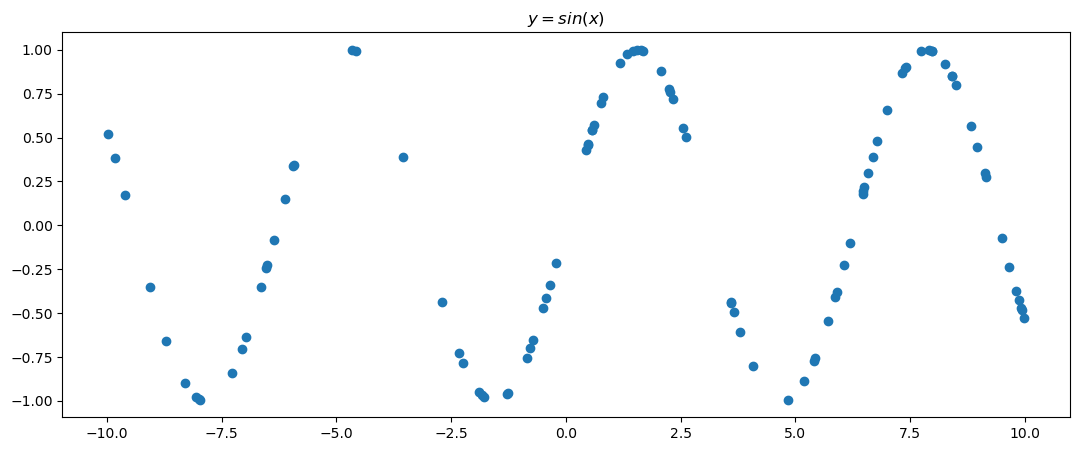

In [5]:


x_train = torch.rand(100)
x_train = x_train * 20.0 - 10.0

y_train = torch.sin(x_train)

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = sin(x)$');



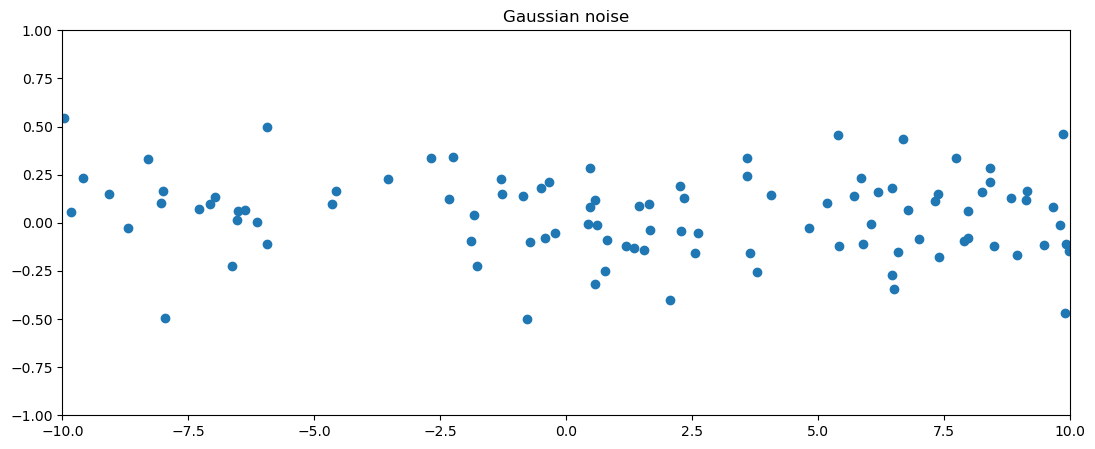

In [6]:
noise = torch.randn(y_train.shape) / 5.

plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise');

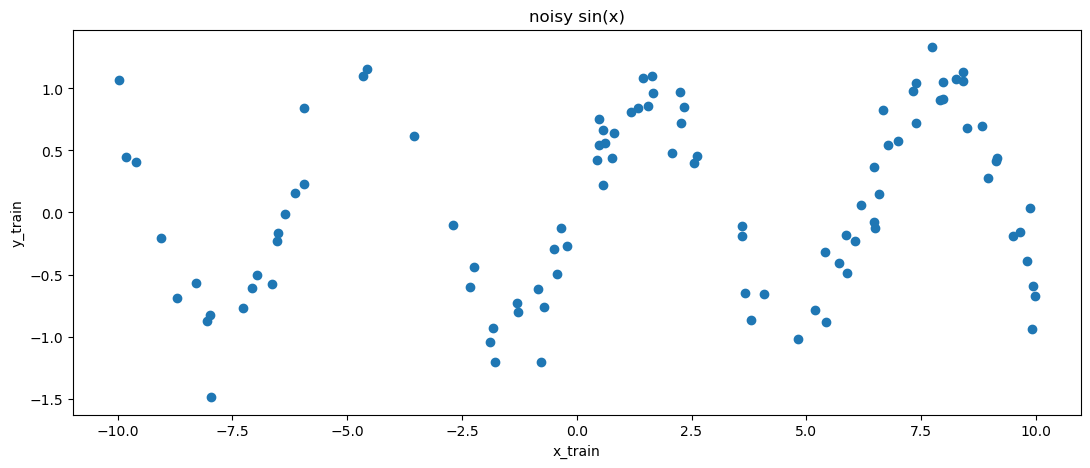

In [7]:


y_train = y_train + noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train');



In [8]:


x_train.unsqueeze_(1)
y_train.unsqueeze_(1);



In [9]:
tmp = torch.Tensor([1,2,3])
print(tmp)
print(tmp.unsqueeze(1))

tensor([1., 2., 3.])
tensor([[1.],
        [2.],
        [3.]])


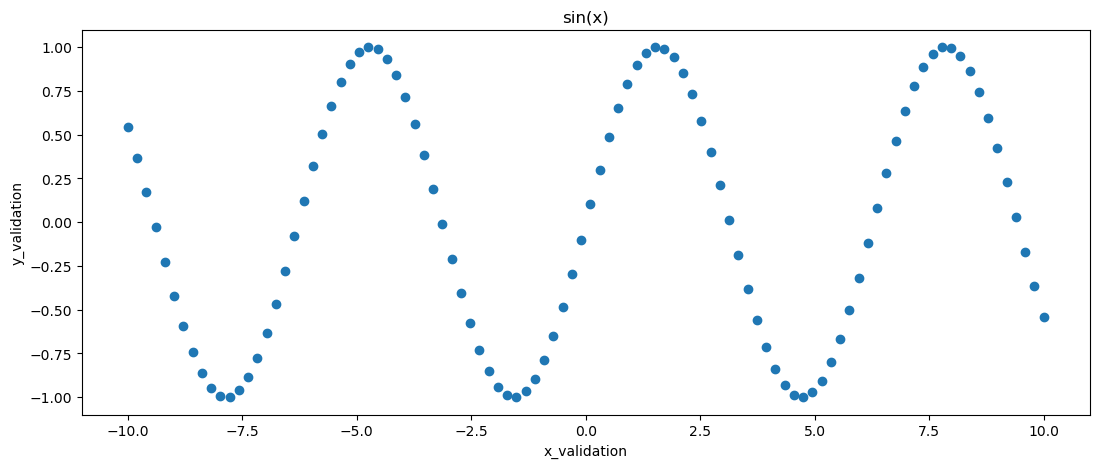

In [10]:
x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation.data)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation');

In [11]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)

In [12]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

sine_net = SineNet(50)

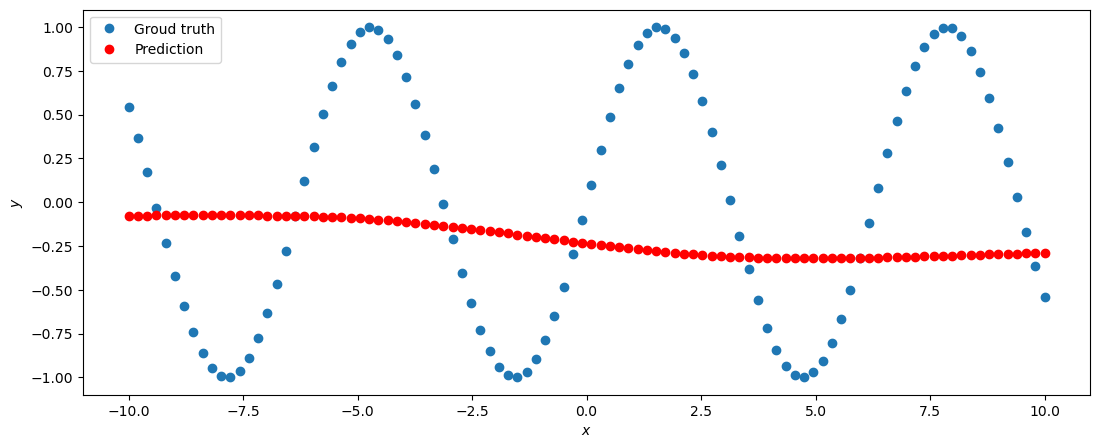

In [13]:
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

predict(sine_net, x_validation, y_validation)

In [14]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01)

In [15]:
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

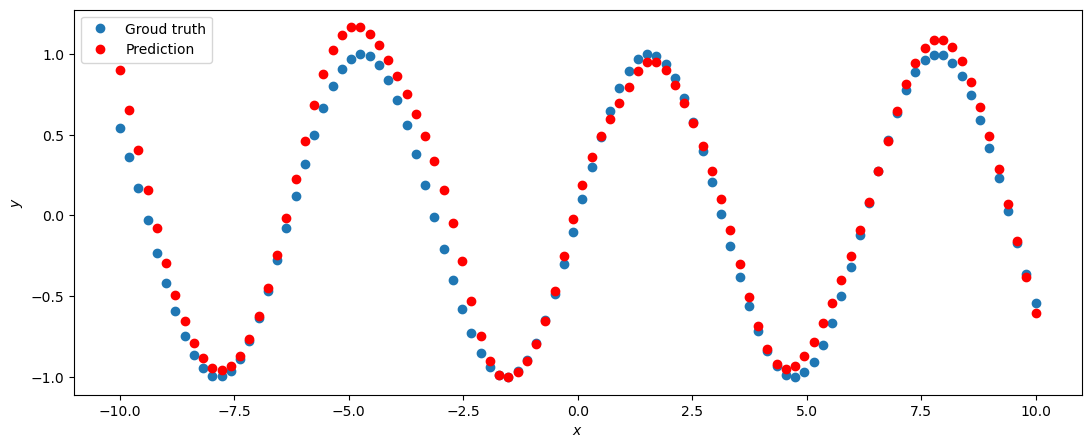

In [16]:
for epoch_index in range(2000):
    optimizer.zero_grad()

    y_pred = sine_net.forward(x_train)
    loss_val = loss(y_pred, y_train)

    loss_val.backward()

    optimizer.step()

predict(sine_net, x_validation, y_validation)

0.03244148567318916


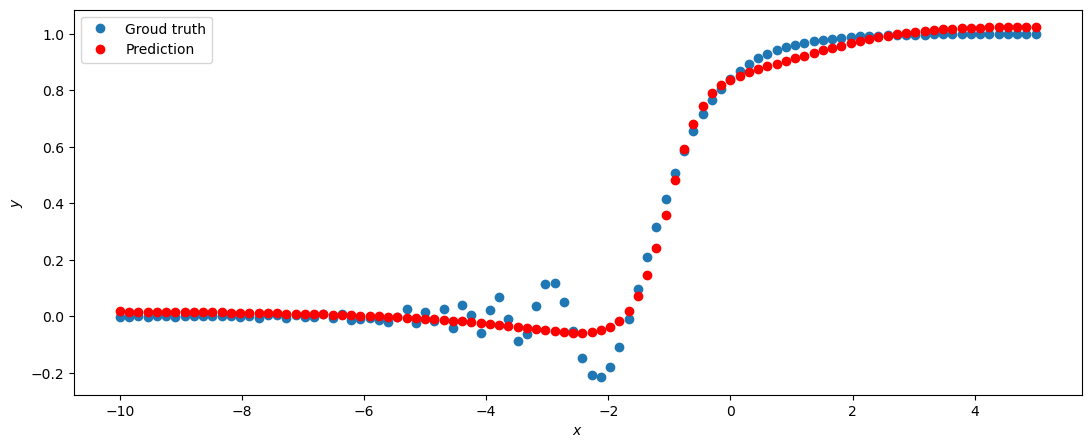

In [17]:
import torch

def target_function(x):
    return 2**x * torch.sin(2**-x)

class RegressionNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(RegressionNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.act2 = torch.nn.Sigmoid()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 1)
        

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        return x

net = RegressionNet(50)

# ------Dataset preparation start--------:
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)
# ------Dataset preparation end--------:


optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

for epoch_index in range(200):
    optimizer.zero_grad()

    y_pred = net.forward(x_train)
    loss_value = loss(y_pred, y_train)
    loss_value.backward()
    optimizer.step()

# Проверка осуществляется вызовом кода:
def metric(pred, target):
    return (pred - target).abs().mean()
#
print(metric(net.forward(x_validation), y_validation).item())
# (раскомментируйте, если решаете задание локально)
predict(net,x_validation, y_validation)

In [18]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [19]:
import torchvision.datasets
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

In [20]:
X_train = MNIST_train.data
y_train = MNIST_train.targets
X_test = MNIST_test.data
y_test = MNIST_test.targets

In [21]:
X_train = X_train.float()
X_test = X_test.float()

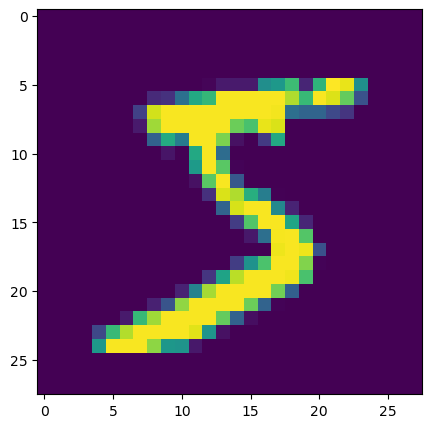

tensor(5)


In [22]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

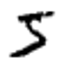

In [23]:
from PIL import Image, ImageOps

img, _ = MNIST_train[0]
img = img.convert('L')
img = ImageOps.invert(img)

display(img.resize((64,64)))

In [24]:
X_train = X_train.reshape([-1, 28 * 28])
X_test = X_test.reshape([-1, 28 * 28])

In [25]:
class MNISTNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(MNISTNet, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, n_hidden_neurons)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 10) 
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x
    
mnist_net = MNISTNet(40)

In [26]:


device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
mnist_net = mnist_net.to(device)




In [27]:


loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3)



In [28]:
batch_size = 100

train_accuracy_history = []
test_accuracy_history = []
train_loss_history = []
test_loss_history = []

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(40):
    order = np.random.permutation(len(X_train))
    
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        
        preds = mnist_net.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()

    #train_preds = mnist_net.forward(X_train)
    #train_loss_history.append(loss(train_preds, y_train).cpu().detach().numpy())    
    #test_preds = mnist_net.forward(X_test)
    #test_loss_history.append(loss(test_preds, y_test).cpu().detach().numpy())
    
    
    #accuracy = (train_preds.argmax(dim=1) == y_train).float().mean().cpu()
    #train_accuracy_history.append(accuracy)
    #accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    #test_accuracy_history.append(accuracy)
    #print(accuracy)

Text(0, 0.5, '%')

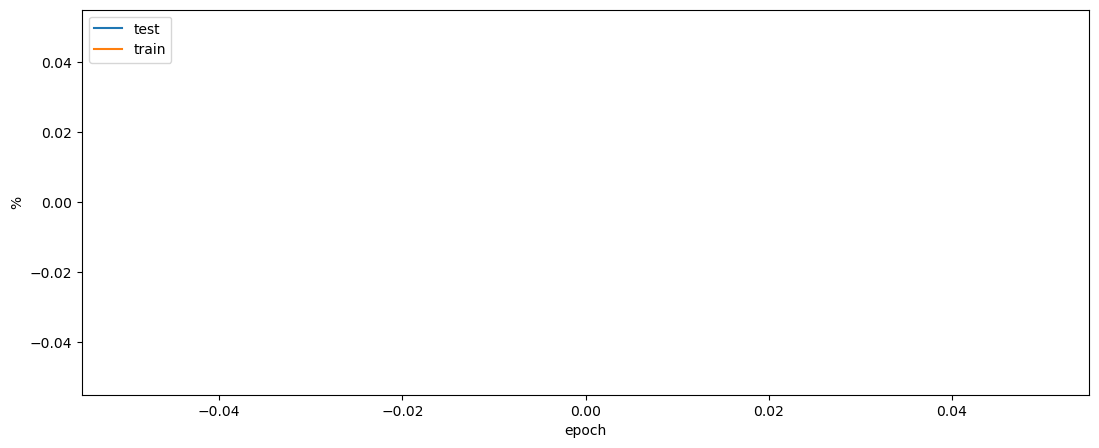

In [29]:
plt.plot(test_accuracy_history, label = 'test')
plt.plot(train_accuracy_history, label = 'train')
plt.legend(loc='upper left')
plt.xlabel('epoch')
plt.ylabel('%')

Text(0, 0.5, '%')

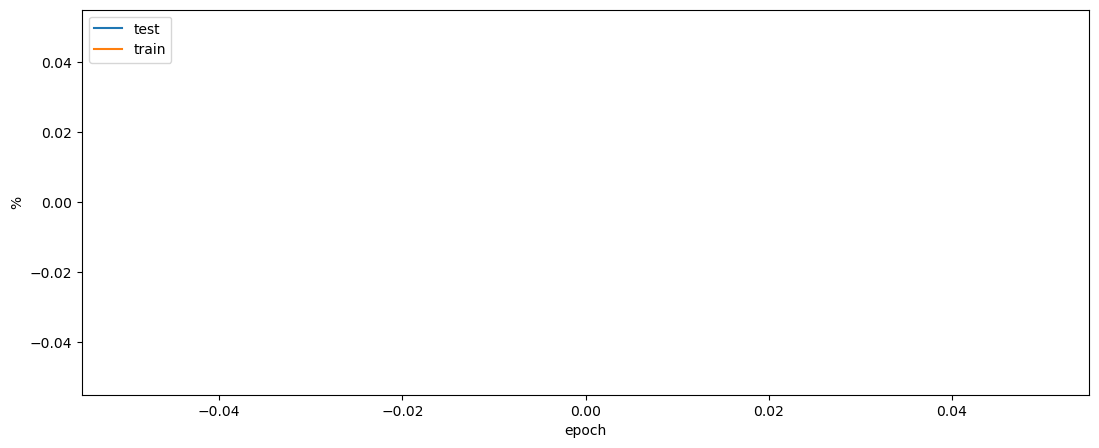

In [30]:
plt.plot(test_loss_history, label = 'test')
plt.plot(train_loss_history, label = 'train')
plt.legend(loc='upper left')
plt.xlabel('epoch')
plt.ylabel('%')

In [31]:
from torchvision import transforms

from PIL import Image

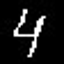

In [32]:
img = Image.open("4test.jpg")#X_train[0, :, :]  "2test.jpg"  

img = img.convert('L')
img = ImageOps.invert(img)
display(img.resize((64,64)))

In [33]:
#img, _ = MNIST_train[2]
#img = Image.open("2test.jpg")
#img = img.convert('L')
#display(img.resize((64,64)))

In [34]:
convert_tensor = transforms.ToTensor()

x_image = convert_tensor(img)#X_train[0, :, :]
x_image.shape
x_image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0078, 0.0196, 0.0000, 0.0039, 0.0000, 0.0196, 0.0000, 0.0039,
          0.0039, 0.0000, 0.0235, 0.0000, 0.0039, 0.0000, 0.0000, 0.0039,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0157, 0.0000, 0.0000, 0.0157, 0.0039, 0.0039, 0.0000, 0.0118,
          0.0000, 0.0157, 0.0078, 0.0000, 0.0118, 0.0000, 0.0118, 0.0078,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000,
          0.0078, 0.0000, 0.0000, 0.0118, 0.0118, 0.0000, 0.0196, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0078, 0.0000, 0.0353, 0.0000, 0.0000, 0.0314, 0.0078, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [35]:
x_image = x_image.reshape([-1,28*28])
x_image = x_image.to(device)

In [36]:
y_image = torch.tensor([8])
y_image = y_image.to(device)
y_image

tensor([8], device='cuda:0')

In [37]:
y_pred = mnist_net(torch.atleast_2d(x_image))
y_pred

tensor([[-5.8145, -2.7293, -3.4160, -2.0160,  0.2064, -2.2166, -6.4625,  2.2478,
         -2.1100, -0.2318]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [38]:
y_pred.argmax(dim=1) == y_image

tensor([False], device='cuda:0')

In [39]:
y_pred.argmax(dim=1)

tensor([7], device='cuda:0')

In [40]:
X_train = MNIST_train.data
y_train = MNIST_train.targets
X_test = MNIST_test.data
y_test = MNIST_test.targets

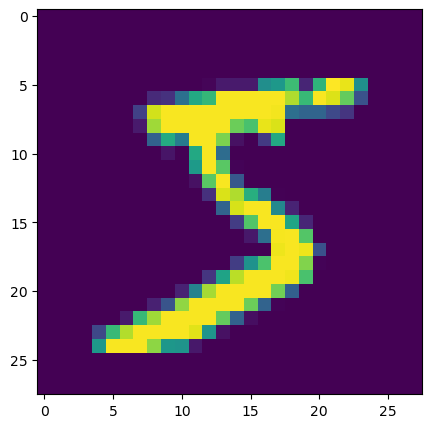

tensor(5)


In [41]:


import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :].cpu())
plt.show()
print(y_train[0])



In [42]:


X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()


X_train.shape

torch.Size([60000, 1, 28, 28])

In [43]:
class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        
        self.conv1 = torch.nn.Conv2d(
            in_channels=1, out_channels=32, kernel_size=5, padding=2)
        # self.act1  = torch.nn.Tanh()
        self.act1  = torch.nn.ELU()
        # self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        self.pool1 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
       
        self.conv2 = torch.nn.Conv2d(
            in_channels=32, out_channels=128, kernel_size=5, padding=0)
        # self.act2  = torch.nn.Tanh()
        self.act2  = torch.nn.ELU()
        # self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        self.pool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv3 = torch.nn.Conv2d(
            in_channels=128, out_channels=64, kernel_size=3, padding=2)
        # self.act3  = torch.nn.Tanh()
        self.act3  = torch.nn.ELU()
        # self.pool3 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        self.pool3 = torch.nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1   = torch.nn.Linear(3 * 3 * 64, 128)
        # self.act4  = torch.nn.Tanh()
        self.act4  = torch.nn.ELU()
        
        self.fc2   = torch.nn.Linear(128, 84)
        self.act5  = torch.nn.Tanh()
        # self.act5  = torch.nn.ELU()
        
        self.fc3   = torch.nn.Linear(84, 10)
    
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)
        
        x = self.conv3(x)
        x = self.act3(x)
        x = self.pool3(x)

        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act4(x)
        x = self.fc2(x)
        x = self.act5(x)
        x = self.fc3(x)
        
        return x
    
lenet5 = LeNet5()

In [44]:
torch.cuda.empty_cache()

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
#device = 'cpu'
lenet5 = lenet5.to(device)



In [45]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet5.parameters(), lr=1.0e-4)

In [46]:
batch_size = 32

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(20):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        
        preds = lenet5.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
        
    test_preds = lenet5.forward(X_test)
    #test_loss_history.append(loss(test_preds, y_test).data.cpu())
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    test_accuracy_history.append(accuracy)
    
    print(accuracy)

RuntimeError: CUDA out of memory. Tried to allocate 490.00 MiB (GPU 0; 4.00 GiB total capacity; 3.08 GiB already allocated; 0 bytes free; 3.09 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
lenet5.forward(X_test)

In [ ]:
#torch.cuda.memory_summary(device=None, abbreviated=False)

plt.plot(test_accuracy_history);
plt.plot(test_loss_history);



In [ ]:
img = Image.open("41test.jpg")#X_train[0, :, :]  "2test.jpg"  

img = img.convert('L')
img = ImageOps.invert(img)
display(img.resize((64,64)))

In [ ]:
convert_tensor = transforms.ToTensor()

x_image = convert_tensor(img)#X_train[0, :, :]
x_image = x_image.unsqueeze(0).float()
x_image.shape
#x_image

In [ ]:
#x_image = x_image.unsqueeze(1).float()
x_image = x_image.float()
x_image = x_image.to(device)

In [ ]:
y_image = torch.tensor([8])
y_image = y_image.to(device)
y_image

In [ ]:
y_pred = lenet5(x_image)
y_pred

In [ ]:
y_pred.argmax(dim=1)